In [22]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS

from scipy.stats import pearsonr

In this data, there is no population-level correlation between math and social skills

In [44]:
N = 10000

m = np.random.normal(600, 50, size=N)
v = np.random.normal(600, 50, size=N)
a = 1.*((m + v) > 1200)
s = a * np.random.binomial(1., size=N, p=0.05)

df = pd.DataFrame({"M": m, "V": v, "A": a, "S": s})

In [45]:
correlation, p_value = pearsonr(df.M, df.V)
correlation, p_value

(-0.0007446059285609871, 0.9406512944644758)

It's apparent when we plot the data in a scatter plot, where we can see it's just a bi-variate gaussian with no M, V covariance.

<AxesSubplot:xlabel='M', ylabel='V'>

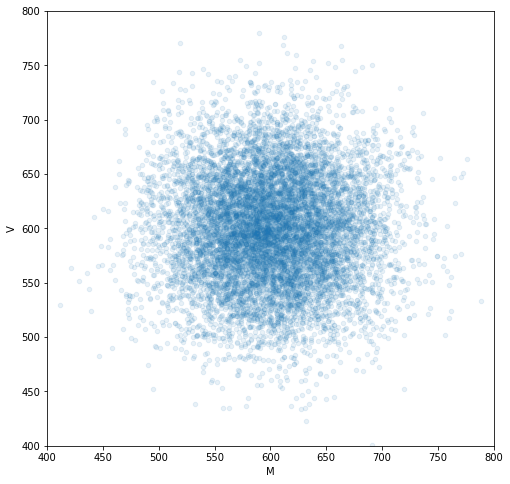

In [48]:
df.plot(x="M", y="V", kind='scatter', alpha=0.1, xlim=(400, 800), ylim=(400, 800), figsize=(8,8))

When we select the population who is admitted to the university, we're selecting the points above the line M + V = 1200.

<AxesSubplot:xlabel='M', ylabel='V'>

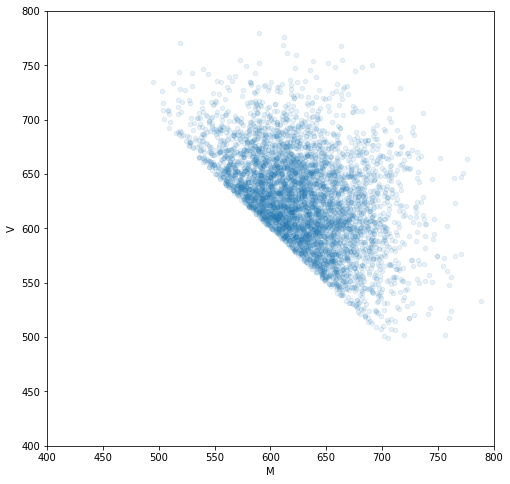

In [47]:
df[df.A==1.].plot(x="M", y="V", kind='scatter', alpha=0.1, xlim=(400, 800), ylim=(400, 800), figsize=(8,8))

This selection induces a very strong negative correlation between social skills and math skills within the population admitted to the university. We've seen this before as "collider bias", and thought of it as bias introduced by conditioning on A=1. The same interpretation is correct here.

In [40]:
correlation, p_value = pearsonr(df[df.A==1].M, df[df.A==1].V)
correlation, p_value

(-0.4654337722133008, 4.6433718242426664e-268)

When we sample a random selection of students in the university to participate in a study, we're conditioning on a descendant, S, of the collider at A. Even though we're sampling at random within the student population, we've already conditioned on attendance, so we still get bias.

<AxesSubplot:xlabel='M', ylabel='V'>

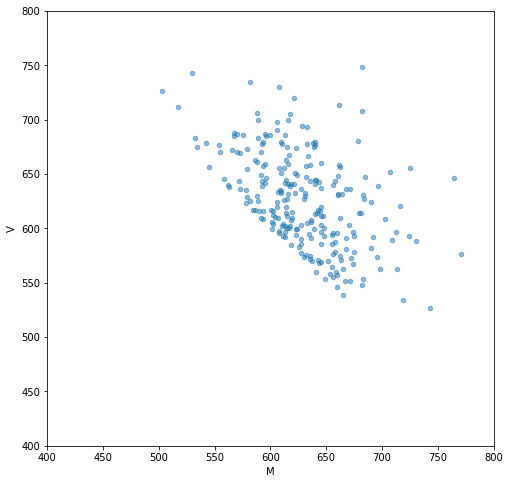

In [50]:
df[df.S==1.].plot(x="M", y="V", kind='scatter', alpha=0.5, xlim=(400, 800), ylim=(400, 800), figsize=(8,8))

In [49]:
correlation, p_value = pearsonr(df[df.S==1].M, df[df.S==1].V)
correlation, p_value

(-0.49069706894403736, 4.5598515498899e-16)

This study has no external validity! There's no general negative relationship between math and social skills -- it's only valid within this specific sample, and even then is a little misleading.